In [86]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
base = pd.read_csv("/Users/evaldocunhafilho/Documents/Data_Science/new_model.csv")
base.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [3]:
base.loc[(base["Htn"] != 1) & (base["Htn"] != 0)] #erro encontrado na analise explorativa

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
288,70.0,1.025,0.0,0.0,1.0,46.0,1.2,135.0,4.9,15.9,11000.0,5.1,0.37,0
297,60.0,1.025,0.0,0.0,1.0,26.0,1.0,146.0,4.9,15.8,7700.0,5.2,0.37,0


In [4]:
grupohtn = base.groupby(["Htn"]).size()
grupohtn

Htn
0.00    251
0.37      2
1.00    147
dtype: int64

In [15]:
base.loc[(base["Htn"] != 1) & (base["Htn"] != 0), "Htn"] = 0.0
base.loc[(base["Htn"] != 1) & (base["Htn"] != 0)]

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class


Explicacao das colunas
 - Bp: Pressão sanguínea
 - Sg: Gravidade Específica
 - Al: Albumina
 - Su: Açucar
 - Rbc: Glóbulos Vermelhos 
 - Bu: Ureia no sangue
 - Sc: Creatinina sérica
 - Sod: Sódio
 - Pot: Potássio
 - Hemo: Hemoglobina
 - Wbcc: Contagem de Glóbulos Brancos
 - Rbcc: Contagem de Glóbulos Vermelhos
 - Htn: Hipertensao

In [6]:
print(base.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


In [7]:
base[base.duplicated]

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class


In [8]:
base.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.367500,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482728,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


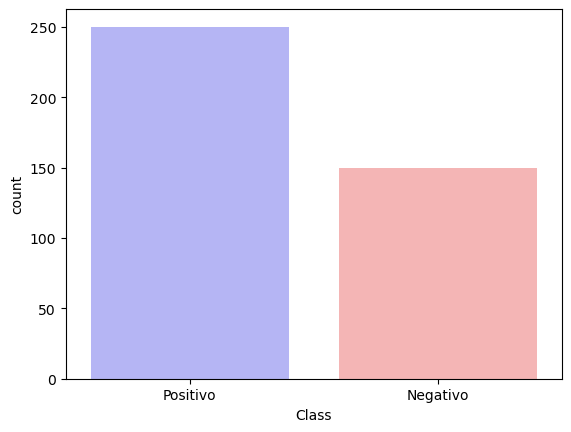

In [9]:
base_target = base.copy()
base_target['Class'] = base_target['Class'].map(lambda x : 'Negativo' if x == 0 else 'Positivo')

sns.countplot(x=base_target['Class'], data=base_target, palette="bwr")
plt.show()

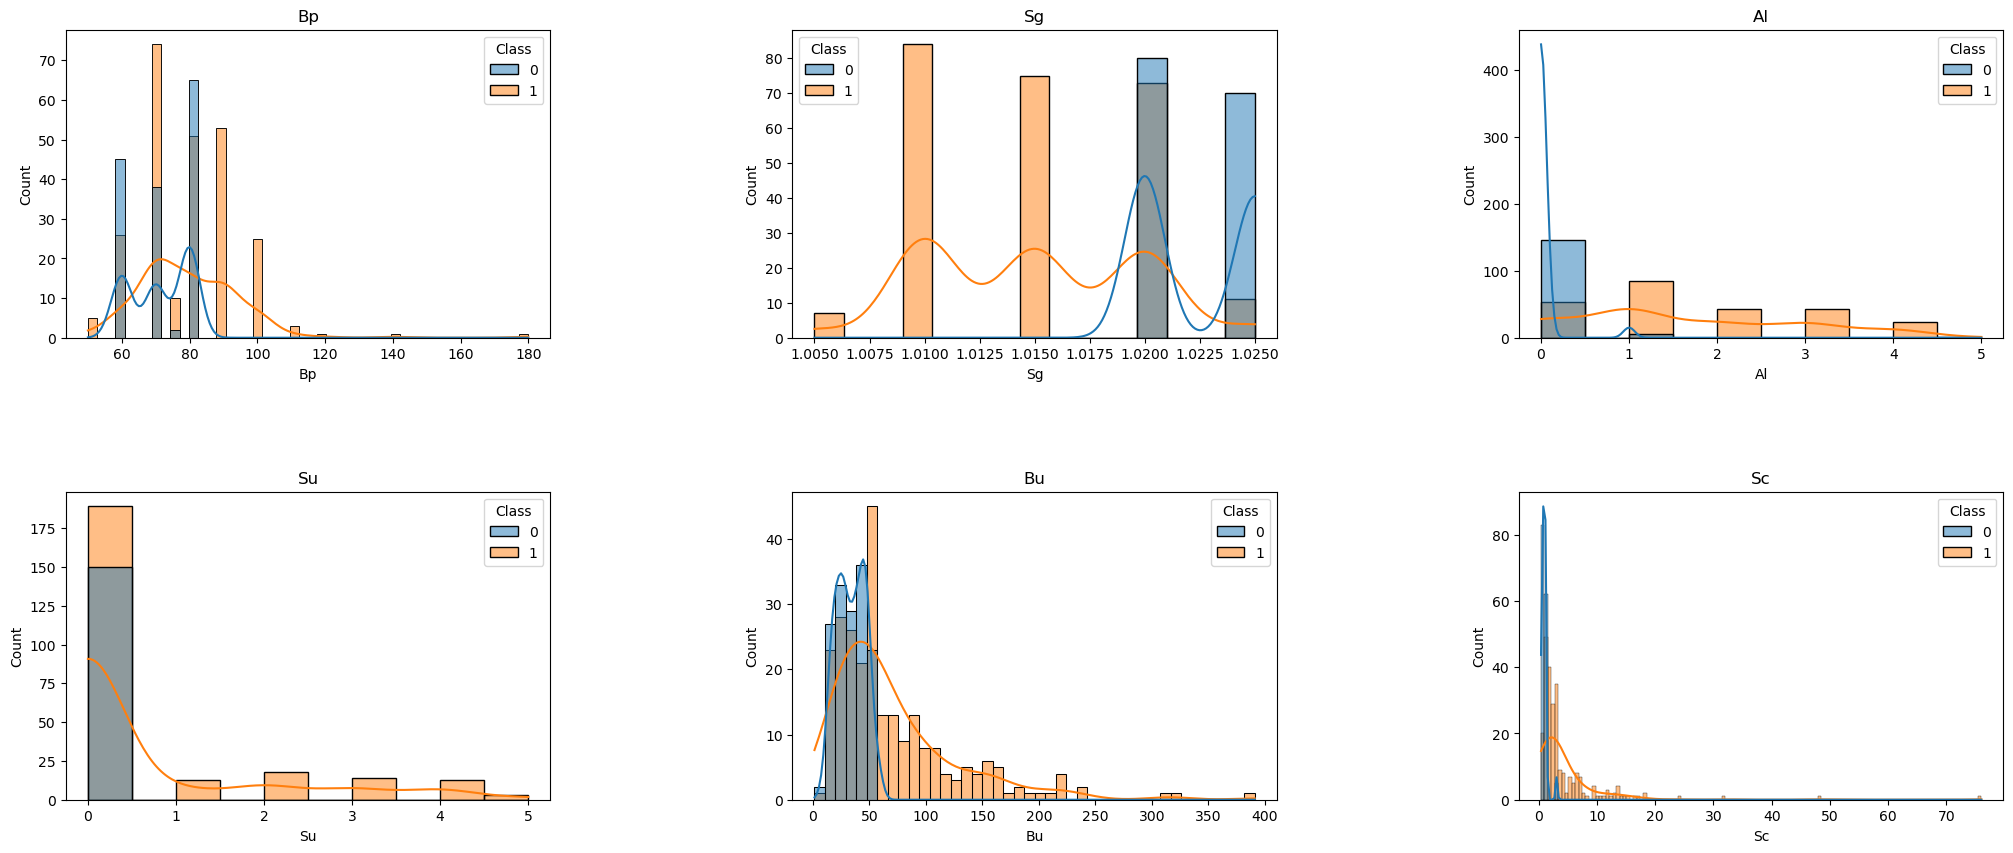

In [10]:
continious_columns = ["Bp", "Sg", "Al", "Su", "Bu", "Sc"]
rows = (len(continious_columns) + 1 )//3

columns = 3

fig,axes = plt.subplots(rows,columns,figsize=(25,5*rows))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
axes = axes.flatten()

for i,col in enumerate(continious_columns):
    sns.histplot(base,x=str(col),ax=axes[i],kde=True,hue='Class')
    axes[i].set_title(col)

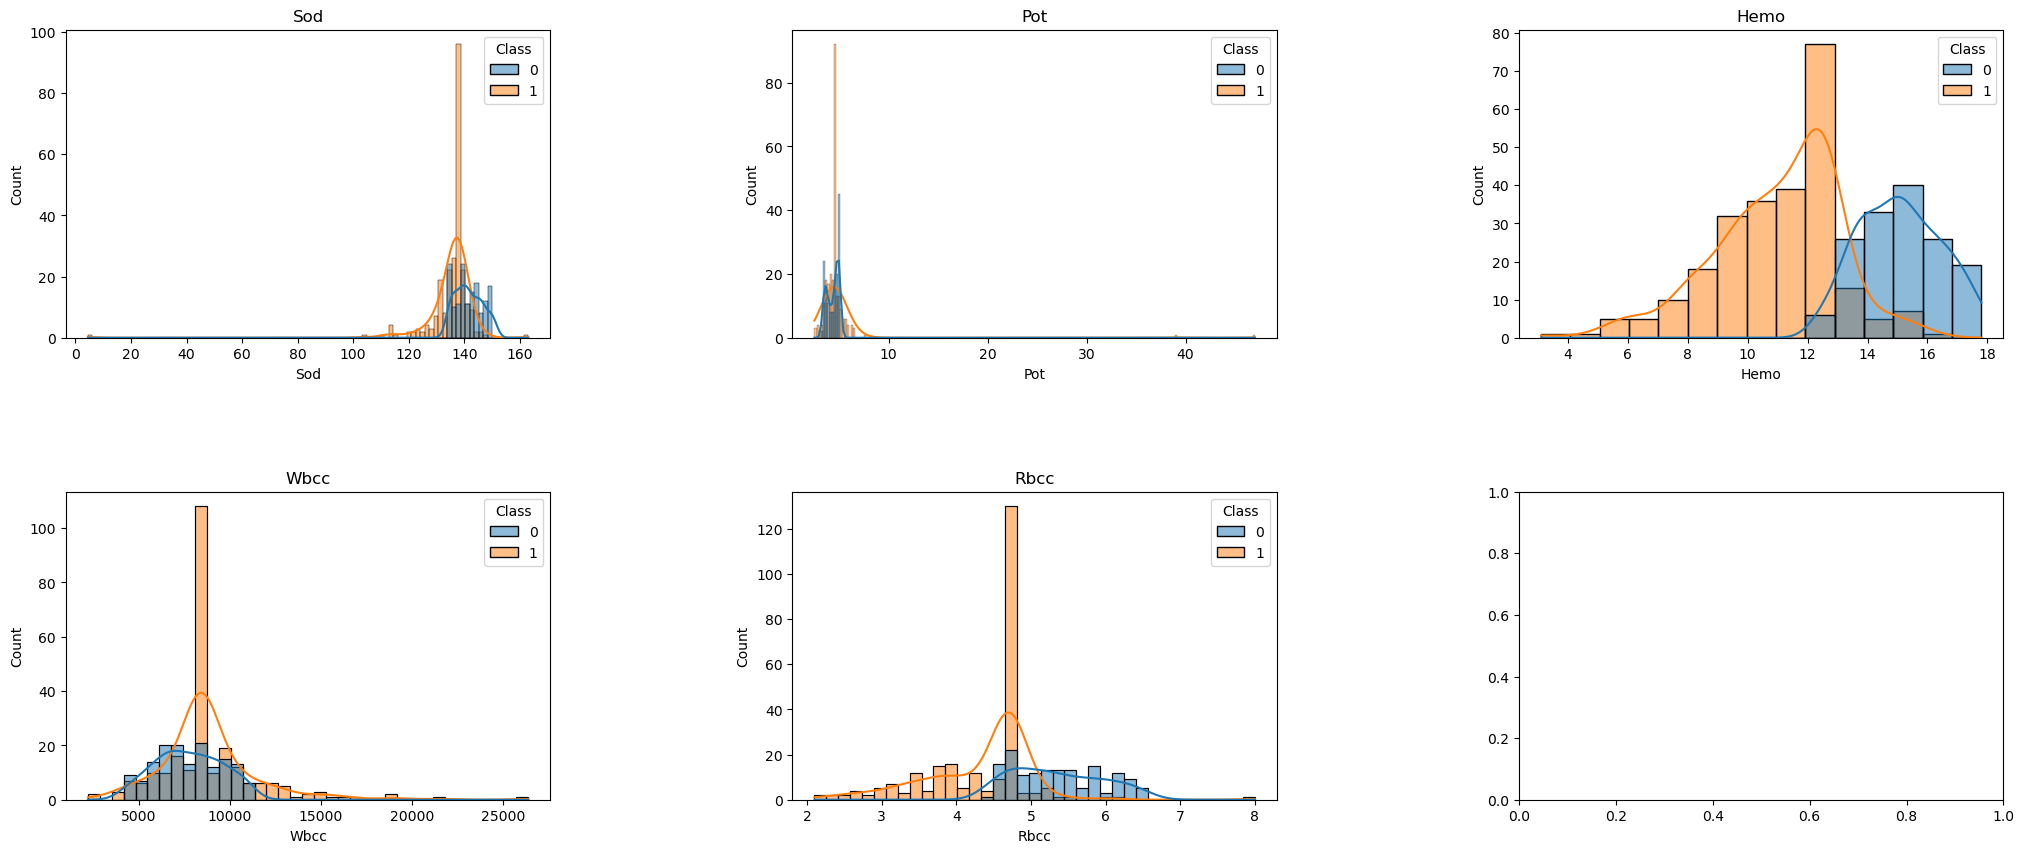

In [11]:
continious_columns = ["Sod", "Pot", "Hemo", "Wbcc", "Rbcc"]
rows = (len(continious_columns) + 1 )//3

columns = 3

fig,axes = plt.subplots(rows,columns,figsize=(25,5*rows))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
axes = axes.flatten()

for i,col in enumerate(continious_columns):
    sns.histplot(base,x=str(col),ax=axes[i],kde=True,hue='Class')
    axes[i].set_title(col)

Anotações:
- pessoas com a pressao acima de 90 sao mais propensas a ter problemas nos rins
- com gravidade especifica abaixo de 1.0175 tambem sao mais propensas a problemas renais
- Pessoas com menos de 1 de albumina no geral nao tem problemas renais
- Pessoas com um pouco mais de 3 de creatina sérica sao mais propensas a ter problemas renais
- Pessoas com menos de 13 de Hemoglobina sao mais propensas a ter problemas
- A falta de um dado muito importante como a idade pode justificar os outliers no sodio, no potassio e outros atributos

Text(0.5, 1.0, 'HTN')

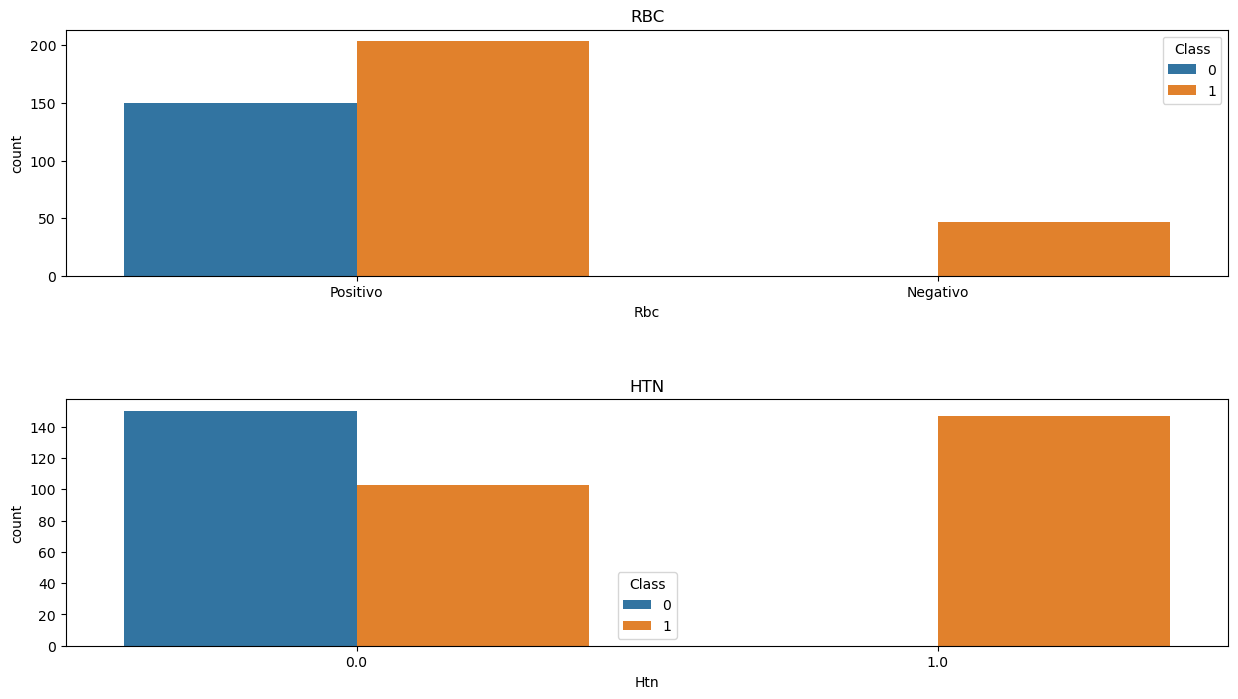

In [19]:
fig,[ax1,ax2] = plt.subplots(2,1,figsize=(15,8))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

base_rbc = base.copy()
base_htn = base.copy()

base_rbc["Rbc"] = base_rbc["Rbc"].map(lambda x : 'Positivo' if x == 1 else 'Negativo')

sns.countplot(base_rbc,x='Rbc',hue='Class',ax=ax1).set_title("RBC")
sns.countplot(base_htn,x='Htn',hue='Class',ax=ax2).set_title("HTN")

Anotações:
- Quem deu negativo nos globulos vermelhos sempre vai ter problema de rim
- quem tem hipertensao sempre vai ter problemas nos rins

<Axes: >

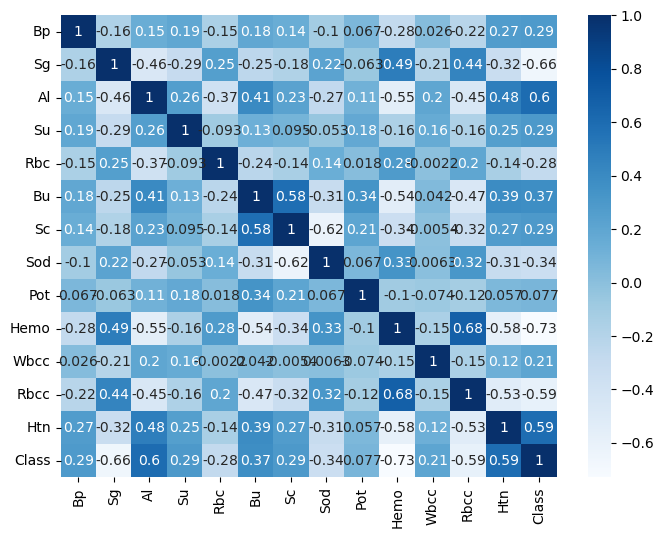

In [21]:
correlacao = base.corr()
plt.rc('figure', figsize = (8, 6))
sns.heatmap(correlacao, cmap="Blues", annot=True)

In [62]:
previsores = base.drop(columns=["Class"]).values
classe = base["Class"].values
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [63]:
previsores

array([[ 2.63379226e-01,  4.21485600e-01, -1.18041644e-02, ...,
        -2.40505799e-01,  5.85900177e-01,  1.31190260e+00],
       [-1.96549998e+00,  4.21485600e-01,  2.34902872e+00, ...,
        -9.54773379e-01,  2.05537202e-03, -7.62251709e-01],
       [ 2.63379226e-01, -1.42107440e+00,  7.75140131e-01, ...,
        -3.59550396e-01,  2.05537202e-03, -7.62251709e-01],
       ...,
       [ 2.63379226e-01,  4.21485600e-01, -7.98748460e-01, ...,
        -7.16684186e-01,  8.24204178e-01, -7.62251709e-01],
       [-1.22254025e+00,  1.34276560e+00, -7.98748460e-01, ...,
        -4.78594992e-01,  1.41996418e+00, -7.62251709e-01],
       [ 2.63379226e-01,  1.34276560e+00, -7.98748460e-01, ...,
        -6.37321121e-01,  1.65826818e+00, -7.62251709e-01]])

In [66]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.2, random_state=42)

In [68]:
#Naive Bayes
naives = GaussianNB()
naives.fit(X_treinamento, y_treinamento)
prevnaives = naives.predict(X_teste)

In [72]:
#Arvore de decisao
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)
prevarvore = arvore.predict(X_teste)
export_graphviz(arvore, out_file="arvorerim.dot")

In [74]:
#Suport Vector Machine
svm = SVC()
svm.fit(X_treinamento, y_treinamento)
prevsvm = svm.predict(X_teste)

In [87]:
previsoes = [prevnaives, prevarvore, prevsvm]
algoritmos = ['Naives Bayes', 'Arvore de Decisao', 'SVM']

for i in range(3):
    accuracy = accuracy_score(y_teste, previsoes[i])
    cm = confusion_matrix(y_teste, previsoes[i])
    print(f"""Algorimo - {algoritmos[i]}
Precisao = {accuracy}
Matriz confusao:
{cm}
""")

Algorimo - Naives Bayes
Precisao = 0.95
Matriz confusao:
[[28  0]
 [ 4 48]]

Algorimo - Arvore de Decisao
Precisao = 1.0
Matriz confusao:
[[28  0]
 [ 0 52]]

Algorimo - SVM
Precisao = 1.0
Matriz confusao:
[[28  0]
 [ 0 52]]

